In [315]:
# Imports

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.25]

In [316]:
# Bring in the raw data

dt_train_raw = pd.read_csv('train.csv')
dt_test_raw = pd.read_csv('test.csv')

In [317]:
dt_train_raw.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
964,965,60,RL,80.0,11316,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,214900
875,876,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,303477
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500


In [318]:
# Set & view all the categories

categories = dt_train_raw.columns
categories

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

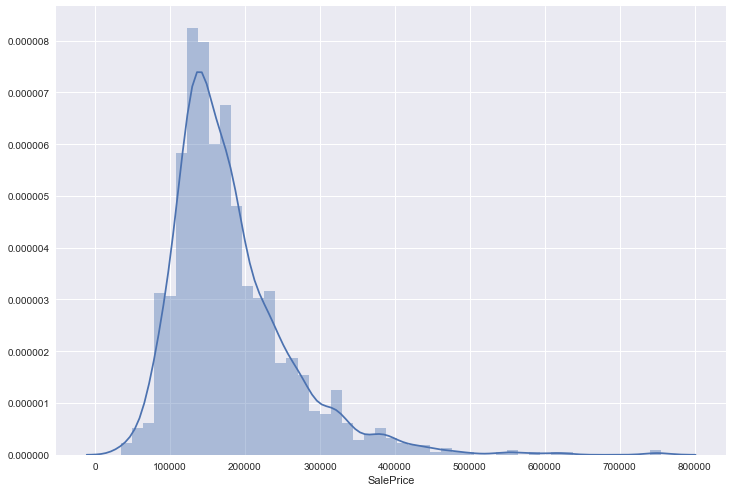

In [319]:
# Hist and dist of 'SalePrice'

sns.distplot(dt_train_raw['SalePrice'])

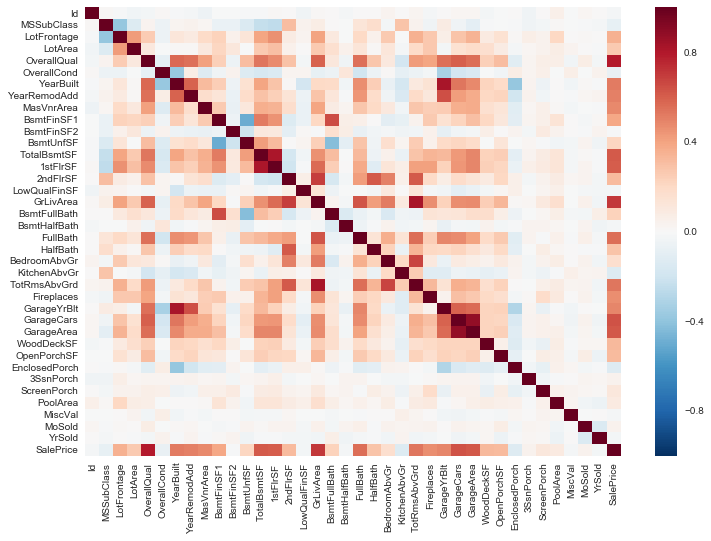

In [320]:
# Look at correlations between all the (numerical) variables

correlations = dt_train_raw.corr()
sns.heatmap(correlations)

In [321]:
correlations.sample(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
EnclosedPorch,0.002889,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578


In [322]:
# Now just correlations w/ SalePrice, sorted by highest to lowest

corrs_saleprice = correlations['SalePrice'].sort_values(axis=0, ascending=False)
corrs_saleprice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

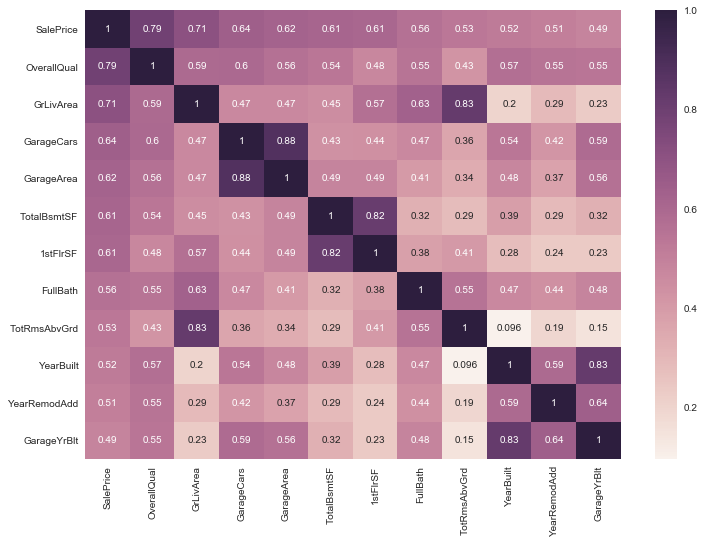

In [323]:
# heatmap of the top 12 most correlated features

features = corrs_saleprice.nlargest(12).index
saleprice_corrmat = dt_train_raw[features].corr()
sns.heatmap(saleprice_corrmat, annot=True)



In [324]:
# A few notes from above:

#  1) High corr between 'GarageArea' and 'GarageCars' (i.e. garage size vs num of cars held).
#     Probably redundant variables.
# 
#  2) High corr between 'GrLivArea' and 'TotRmsAbvGrd.'
#     Probably redundant variables.
#
#  3) High corr between 'YearBuilt' and 'GarageYrBuilt.' The latter is relatively weak w.r.t. SalePrice.
#    'GarageYrBuilt' can probably be tossed. 
#
#  4) Low corr features < |0.2| can probably be discarded for now.
 

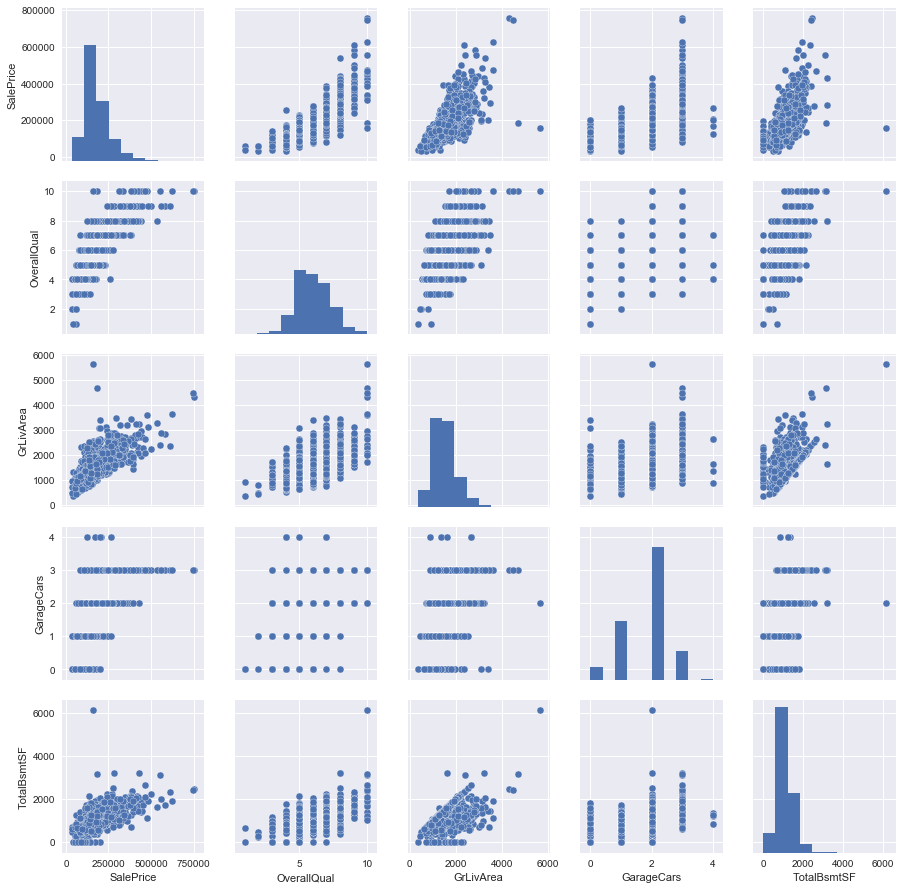

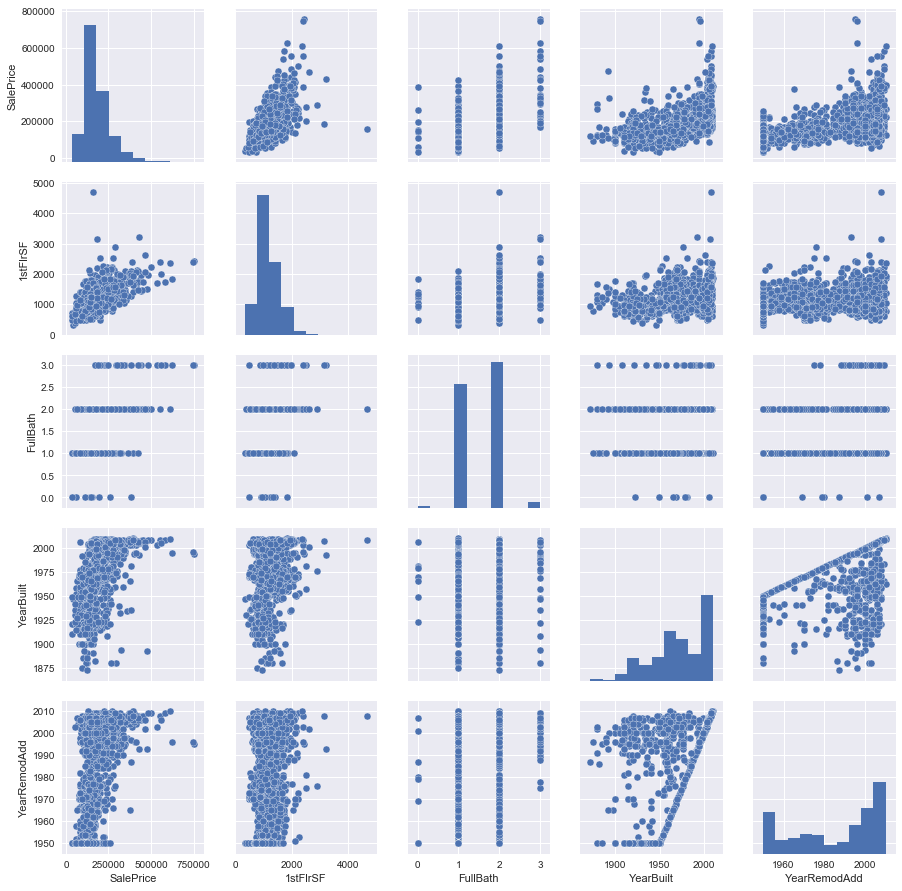

In [325]:


# Looking at scatter plots of these variables to check for noticible relations.
# Ignoring 'GarageArea', 'TotRmsAbvGrd', and 'GarageYrBuilt'

plotset1 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
       'TotalBsmtSF']
plotset2 = ['SalePrice', '1stFlrSF','FullBath', 'YearBuilt',
       'YearRemodAdd']

sns.pairplot(dt_train_raw[plotset1])
sns.pairplot(dt_train_raw[plotset2])

In [326]:
# Notes on SalePrice vs [feature]: 
#
# vs OverallQual looks roughly exponential.
#
# vs GrLivArea has outliers to drop.
#
# vs GarageCars looks roughly/gently exponential.
#
# vs TotalBsmtSF has an outlier to drop. 
#
# vs 1stFlrSF has outlier to drop.
#
# vs FullBath is gently exponential?
#
# YearBuilt > 2000 has a spike in price. Same with YearRemodAdd


In [327]:

# How much missing data is there in the training set?

nulls = dt_train_raw.apply(lambda x : sum(x.isnull()))
nulls = nulls.sort_values(axis=0, ascending=False)
nulls.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [328]:
# Now some data grooming:

# Those first 6 results above can be dropped:
dt_train = dt_train_raw.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'], axis=1)
dt_test = dt_test_raw.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'], axis=1)

# Also the low-correlation features < |0.2| mentioned earlier:
drop_features = ['BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr']

dt_train = dt_train.drop(drop_features, axis=1)
dt_test = dt_test.drop(drop_features, axis=1)

# Also the redundant features 'GarageArea', 'TotRmsAbvGrd', and 'GarageYrBlt':
redund_features = ['GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt']

dt_train = dt_train.drop(redund_features, axis=1)
dt_test = dt_test.drop(redund_features, axis=1)

In [329]:
print(dt_train.columns)
print(len(dt_train.columns))
print(dt_test.columns)
print(len(dt_test.columns))

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')
57
Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope'

In [330]:
# Now we have groomed sets dt_train and dt_test


# Let's try a quick linear regression on just the high-corr numerical features from above.

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

hc_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
       'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt','YearRemodAdd']
dt_train_hc = dt_train[hc_features]
dt_train_hc.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [331]:

# Let's examine & clean/prep each of these features
#
#

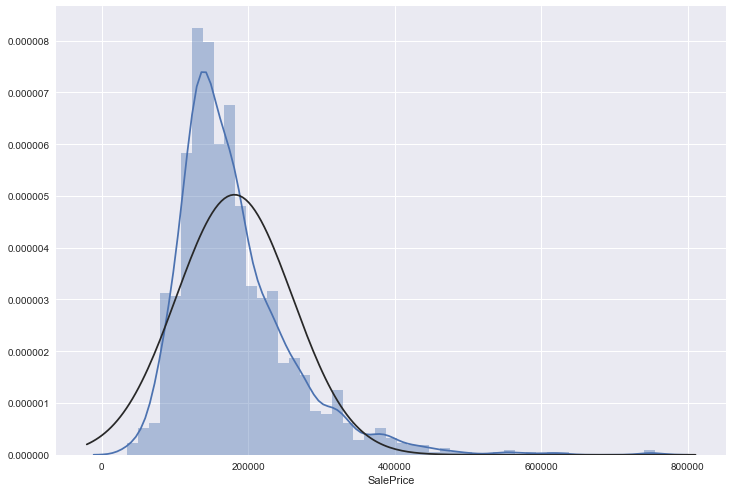

In [332]:

# SalePrice

sns.distplot(dt_train_hc['SalePrice'], fit=norm)


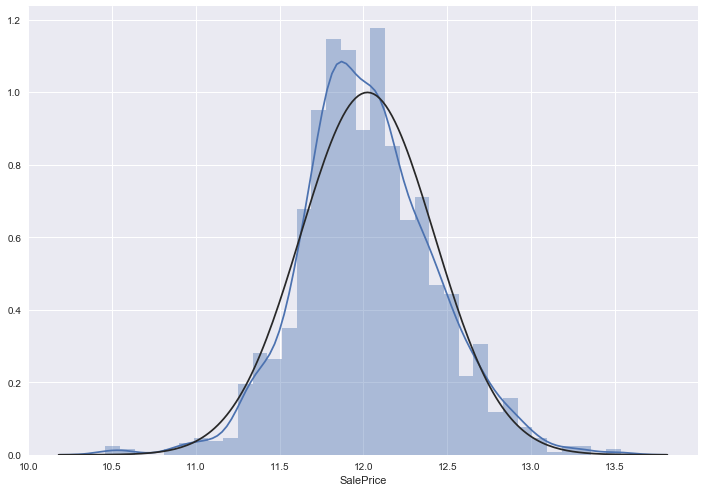

In [333]:
dt_train_hc['SalePrice'] = np.log(dt_train_hc['SalePrice'])
sns.distplot(dt_train_hc['SalePrice'], fit=norm)

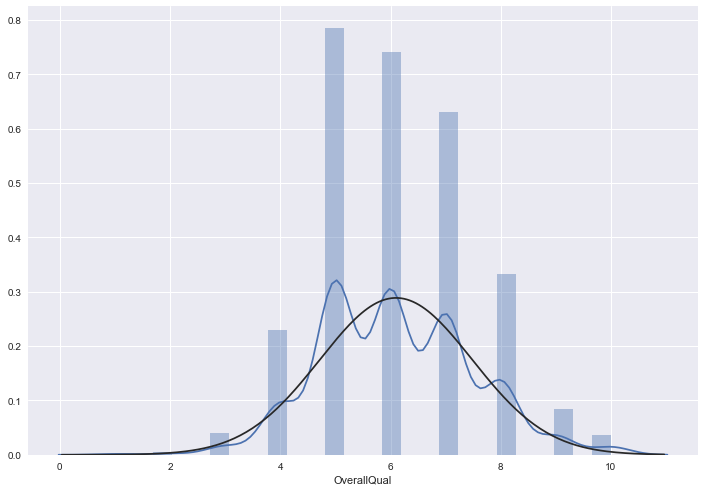

In [334]:

# OverallQual

sns.distplot(dt_train_hc['OverallQual'], fit=norm)

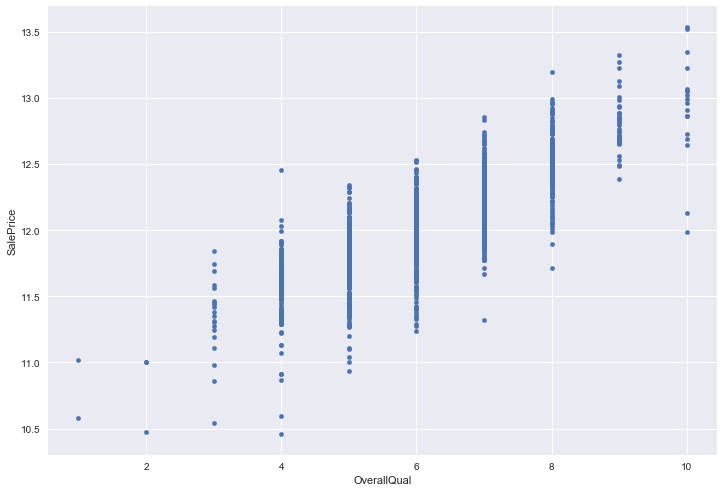

In [335]:
dt_train_hc.plot.scatter(x='OverallQual', y='SalePrice')

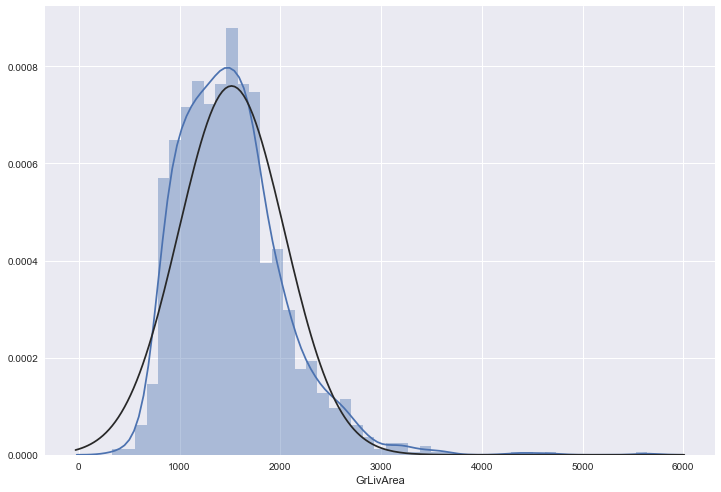

In [336]:

# GrLivArea

sns.distplot(dt_train_hc['GrLivArea'], fit=norm)

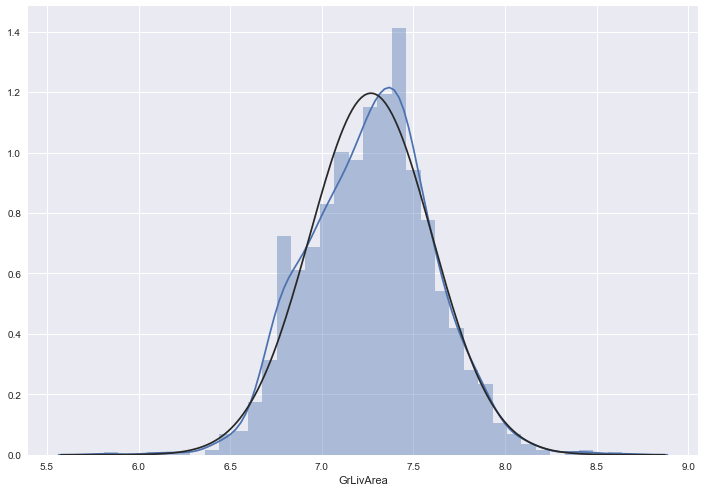

In [337]:
dt_train_hc['GrLivArea'] = np.log(dt_train_hc['GrLivArea'])
sns.distplot(dt_train_hc['GrLivArea'], fit=norm)

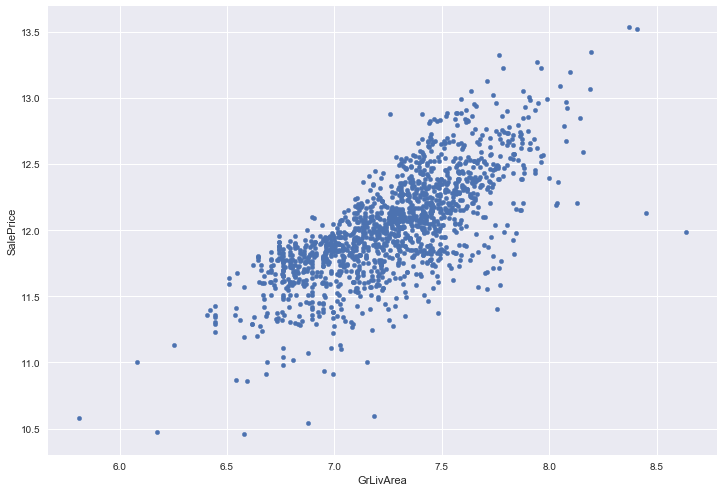

In [338]:
dt_train_hc.plot.scatter(x='GrLivArea', y='SalePrice')

In [339]:
# throw away those two right-center outliers

dt_train_hc['GrLivArea'].sort_values(axis=0, ascending=False).head(3)

1298    8.637994
523     8.450198
1182    8.406485
Name: GrLivArea, dtype: float64

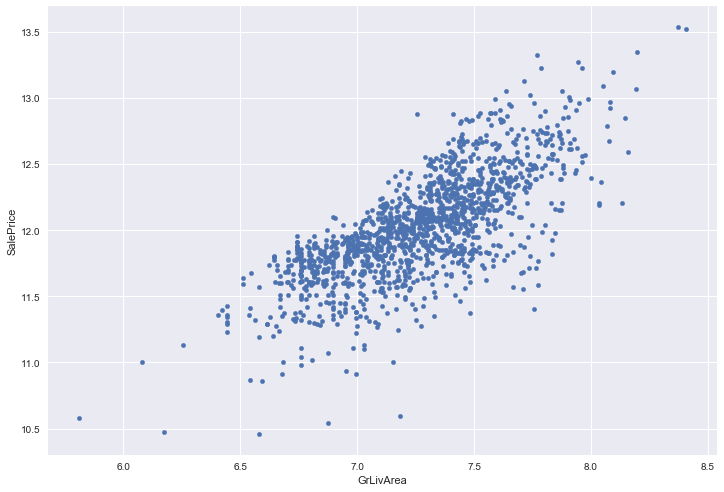

In [340]:
dt_train_hc = dt_train_hc.drop(dt_train_hc.index[[1298,523]]);
dt_train = dt_train.drop(dt_train.index[[1298,523]]);

dt_train_hc.plot.scatter(x='GrLivArea', y='SalePrice')

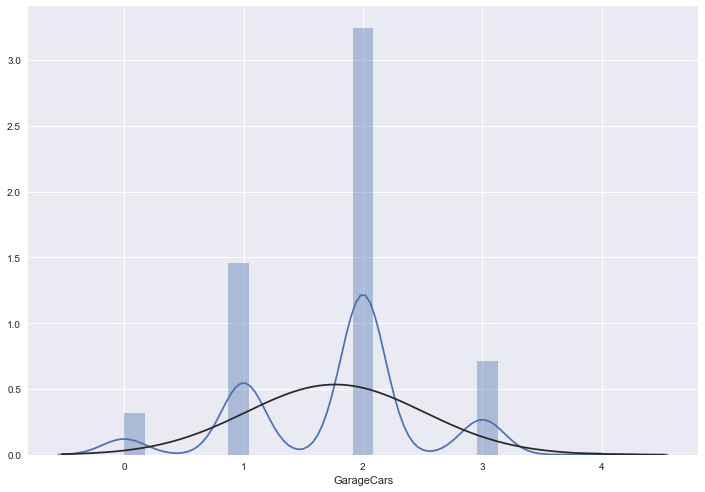

In [341]:

# GarageCars

sns.distplot(dt_train_hc['GarageCars'], fit=norm)

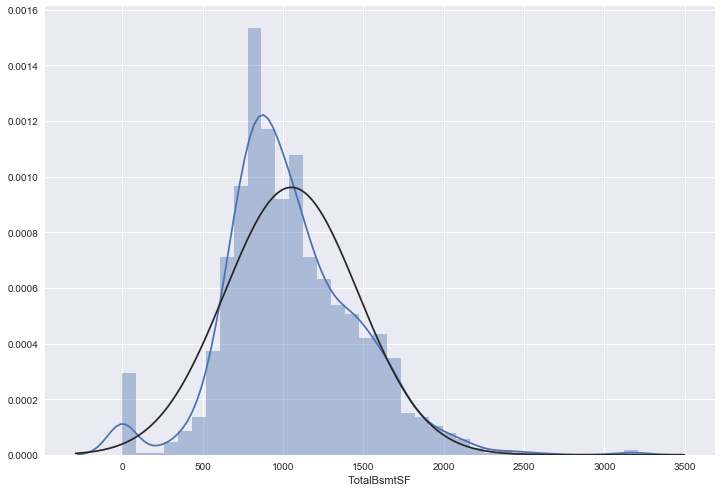

In [342]:

# TotalBsmtSF


dt_train_hc['TotalBsmtSF'] = dt_train['TotalBsmtSF']
sns.distplot(dt_train_hc['TotalBsmtSF'], fit=norm)

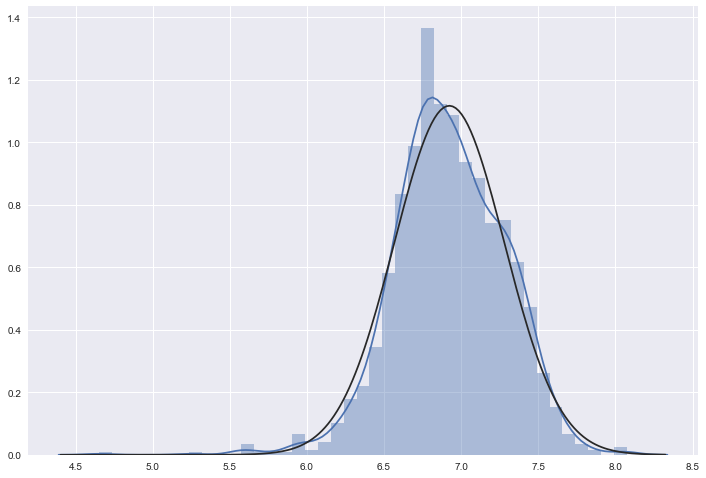

In [343]:

# Look at the log transform only the non-zero values

clmn = dt_train_hc['TotalBsmtSF']

def apply_to_nonzero(column, func):
    return [func(x) for x in column if x!=0]

logtest = apply_to_nonzero(clmn, lambda x: np.log(x))
sns.distplot(logtest, fit=norm)

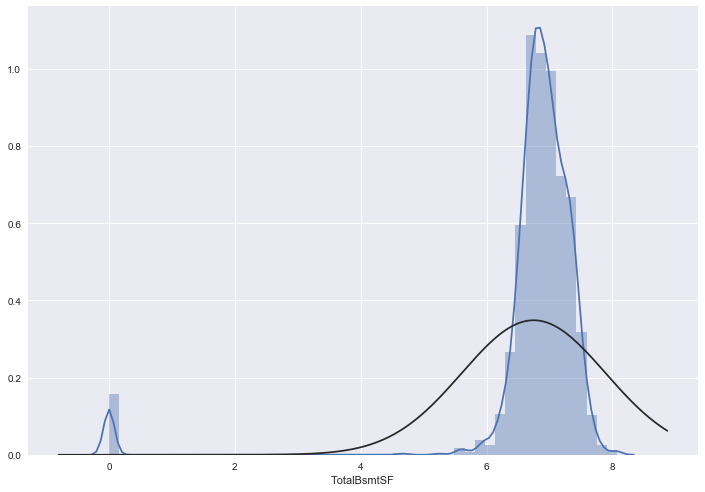

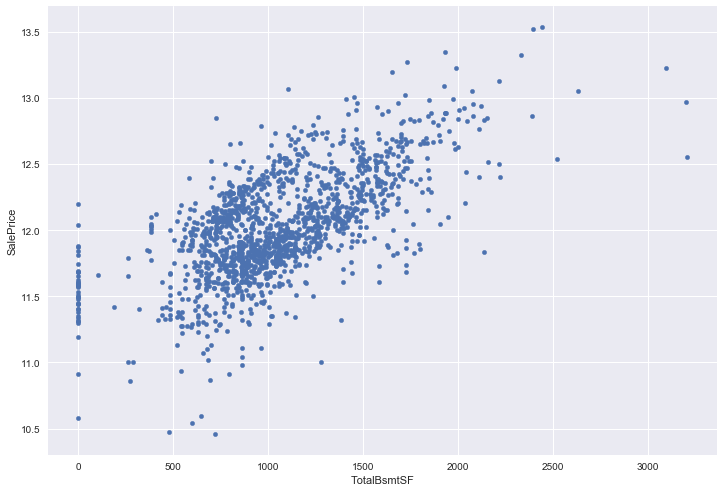

In [344]:

# looks good. Using Log(1+x) function np.log1p on the actual data column.
# There will be a skew at 0, but it should suffice for now.

dt_train_hc['TotalBsmtSF'] = np.log1p(dt_train_hc['TotalBsmtSF'])

sns.distplot(dt_train_hc['TotalBsmtSF'], fit=norm)
dt_train_test.plot.scatter(x='TotalBsmtSF', y='SalePrice')

In [345]:

# ^^ That will suffice for now.

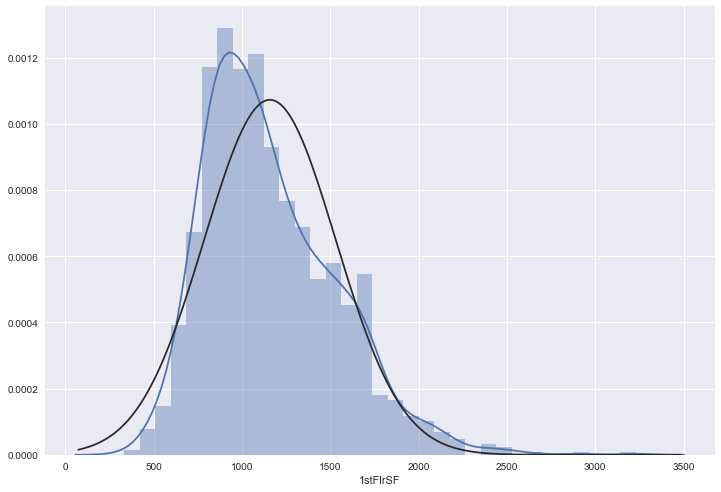

In [346]:

# 1stFlrSF

sns.distplot(dt_train_hc['1stFlrSF'], fit=norm)

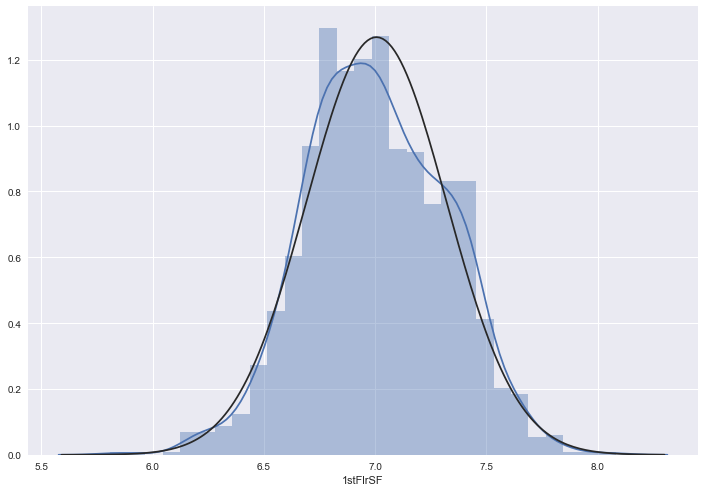

In [347]:
dt_train_hc['1stFlrSF'] = np.log(dt_train_hc['1stFlrSF'])
sns.distplot(dt_train_hc['1stFlrSF'], fit=norm)

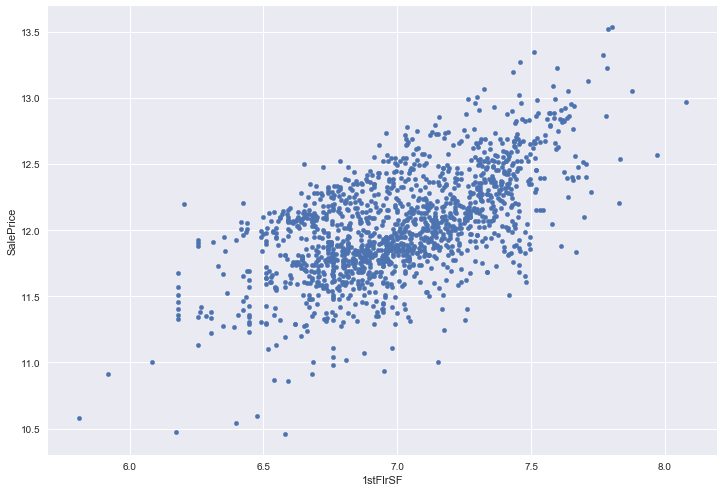

In [348]:
dt_train_hc.plot.scatter(x='1stFlrSF', y='SalePrice')

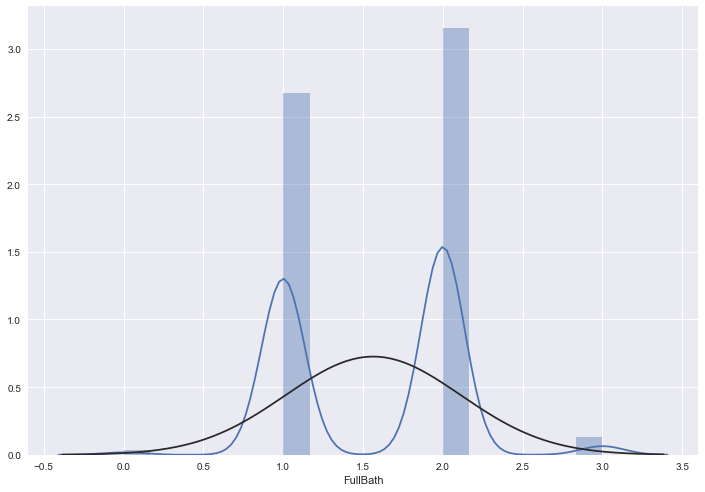

In [349]:

# FullBath

sns.distplot(dt_train_hc['FullBath'], fit=norm)

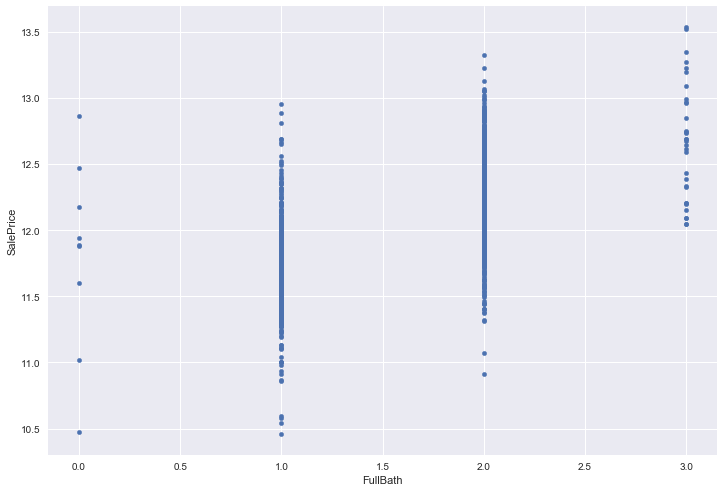

In [350]:
dt_train_hc.plot.scatter(x='FullBath', y='SalePrice')

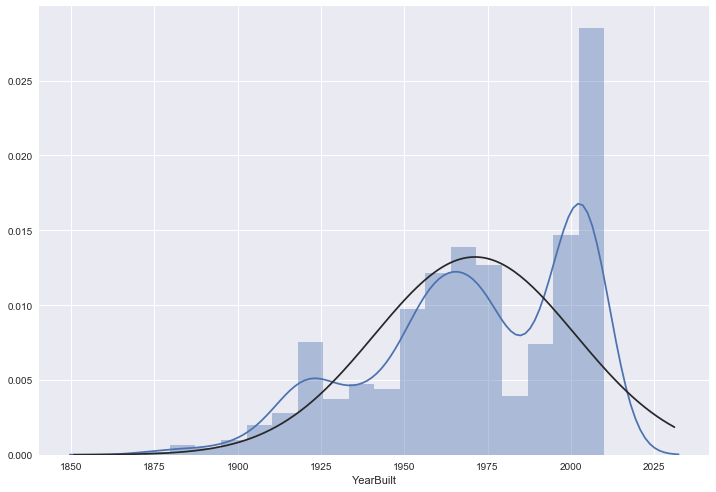

In [351]:

# YearBuilt

sns.distplot(dt_train_hc['YearBuilt'], fit=norm)

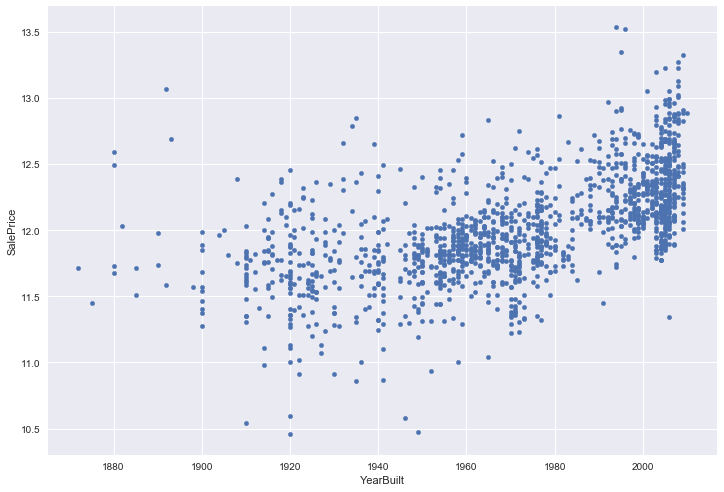

In [352]:
dt_train_hc.plot.scatter(x='YearBuilt', y='SalePrice')

In [353]:

# ^^ obvious skew towards newer homes. Would 'HomeAge' be more appropriate?


In [354]:
max(dt_train_hc['YearBuilt'])

2010

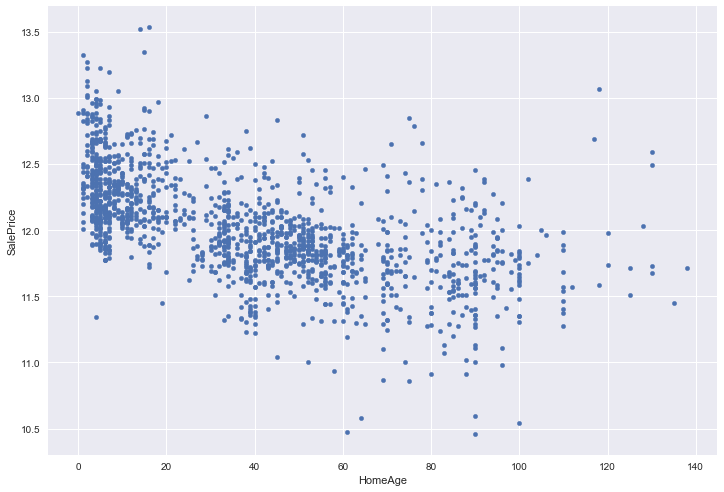

In [355]:
dt_train_hc['HomeAge'] = round(2010 - dt_train_hc['YearBuilt'])
dt_train_hc.plot.scatter(x='HomeAge', y='SalePrice')

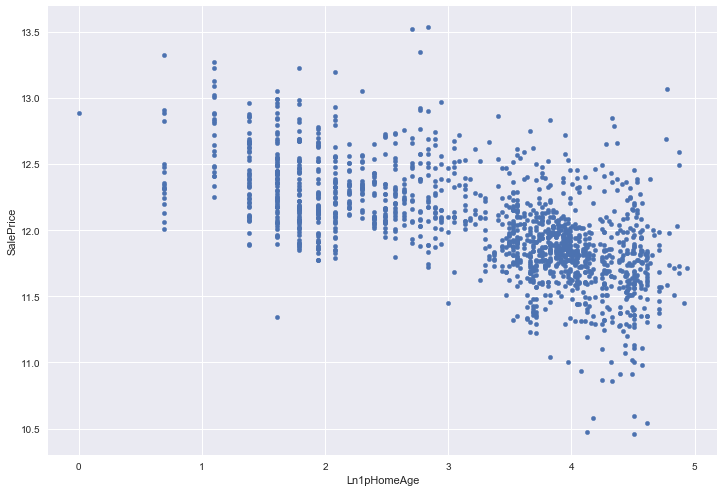

In [356]:
dt_train_hc['Ln1pHomeAge'] = np.log1p(dt_train_hc['HomeAge'])
dt_train_hc.plot.scatter(x='Ln1pHomeAge', y='SalePrice')

In [357]:
min(dt_train_hc['Ln1pHomeAge'])

0.0

In [361]:
# ^^ That's not much better.

# For now let's leave 'HomeAge' alone and move on.

dt_train_hc = dt_train_hc.drop(['Ln1pHomeAge', 'YearBuilt'], axis=1)
dt_train_hc.columns

ValueError: labels ['Ln1pHomeAge' 'YearBuilt'] not contained in axis

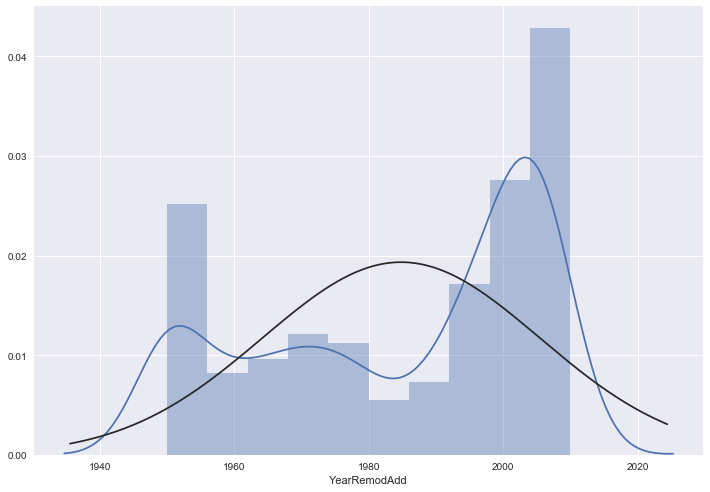

In [362]:

# YearRemodAdd

sns.distplot(dt_train_hc['YearRemodAdd'], fit=norm)

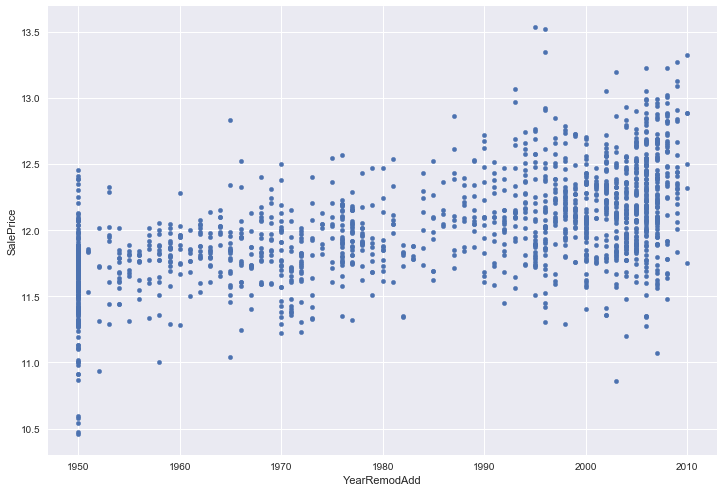

In [363]:
dt_train_hc.plot.scatter(x='YearRemodAdd', y='SalePrice')

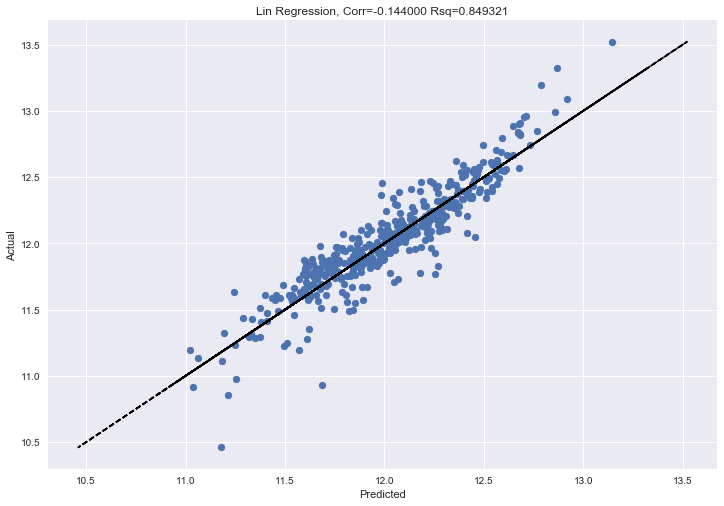

In [376]:
#
#
# Let's try a linear regression on what we have so far.

X = dt_train_hc.drop(['SalePrice'], axis=1)
Y = dt_train_hc['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

lin = LinearRegression()
lin.fit(x_train, y_train)

preds_lin = lin.predict(x_test)
corr = round(pd.Series(preds_lin).corr(pd.Series(y_test)), 3)
r_sqrd = r2_score(y_test, preds_lin)

plt.scatter(preds_lin, y_test)
plt.title("Lin Regression, Corr=%f Rsq=%f" % (corr, r_sqrd))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot(y_test, y_test, 'k--') #x=y line for comparison